<a href="https://colab.research.google.com/github/pradeepfckumar/Credit-Loan-System/blob/main/Credit_Loan_System_Minor_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
+import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn # Added this line to fix the NameError
from sklearn.model_selection import train_test_split

df = pd.read_csv(r'/content/Loan Approval.csv')
df.head()
df.info()
df.isnull().sum()
df.shape
df.describe()

print("numpy", np.__version__)
print("pandas", pd.__version__)
print("sklearn", sklearn.__version__)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

This notebook implements a machine learning pipeline for predicting loan approval based on a given dataset. It covers the following key stages:

1.  **Data Loading and Initial Exploration**: Loads the `Loan Approval.csv` dataset and performs initial data inspection (head, info, null values, shape, descriptive statistics).
2.  **Data Preprocessing**: Handles missing numerical values using mean imputation and missing categorical values using most frequent imputation. It also drops the `Applicant_ID` column.
3.  **Exploratory Data Analysis (EDA)**: Visualizes distributions of categorical features and income, and uses box plots to analyze the relationship between various features and loan approval status. It also explores credit score distribution.
4.  **Feature Engineering**: Encodes categorical variables using `LabelEncoder` for ordinal features and `OneHotEncoder` for nominal features.
5.  **Correlation Analysis**: Computes and visualizes the correlation matrix, highlighting relationships between features and the target variable (`Loan_Approved`).
6.  **Model Training and Evaluation**: Splits the data into training and testing sets, applies `StandardScaler` for feature scaling, and trains and evaluates three classification models: Logistic Regression, K-Nearest Neighbors, and Gaussian Naive Bayes. Performance metrics like accuracy, recall, precision, F1-score, and confusion matrix are reported for each.
7.  **Model Persistence**: Saves the best-performing model (Logistic Regression), the `StandardScaler`, and the `OneHotEncoder` using `joblib` for future use.

In [ ]:
# Data Preprocessing
# Handling Missing Values
# Note : Age is numerical so we use mean to fill the na values
# Note : Gender is categorical so we use mode to fill the na values
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['float64']).columns
categorical_columns
numerical_columns

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer
num_imp = SimpleImputer(strategy='mean')
df[numerical_columns] = num_imp.fit_transform(df[numerical_columns])
df.isnull().sum()
df

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.000000,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.000000,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.000000,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.000000,49272.0,38687.0,48.0,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.000000,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.000000,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.000000,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.000000,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.000000,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.000000,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,10852.571579,9092.0,Salaried,58.0,Married,0.0,557.0,0.0,0.59,5370.000000,43563.0,8311.0,72.0,Personal,NaN,Not Graduate,Male,Unemployed,No
996,997.0,3279.000000,6356.0,Self-employed,58.0,Married,1.0,646.0,3.0,0.19,9940.452632,18361.0,22563.0,12.0,Business,Urban,Graduate,Female,Government,No
997,998.0,15192.000000,8433.0,Contract,48.0,Single,1.0,666.0,1.0,0.40,8581.000000,41335.0,16203.0,24.0,Home,Rural,Graduate,Male,MNC,No
998,999.0,9083.000000,7380.0,Unemployed,50.0,Single,1.0,748.0,3.0,0.31,13491.000000,8933.0,10290.0,36.0,Personal,Urban,Graduate,Male,Private,Yes


In [ ]:
categ_imp = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categ_imp.fit_transform(df[categorical_columns])
df.isnull().sum()
df = df.drop('Applicant_ID', axis = 1)

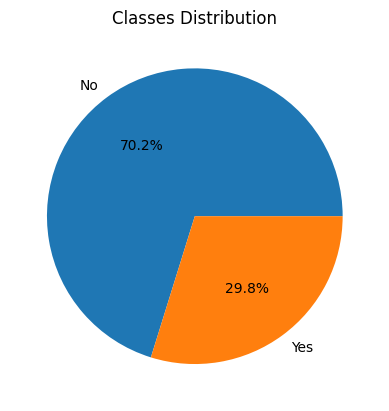

In [ ]:
# EDA : Exploratory Data Analysis
# Check How Balance is our classes in Loan Approve Column..

classes_count = df['Loan_Approved'].value_counts()
plt.pie(classes_count, labels=classes_count.index, autopct='%1.1f%%')
plt.title('Classes Distribution')
plt.show()

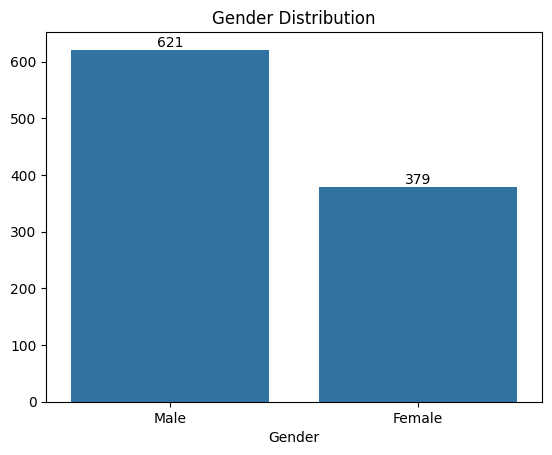

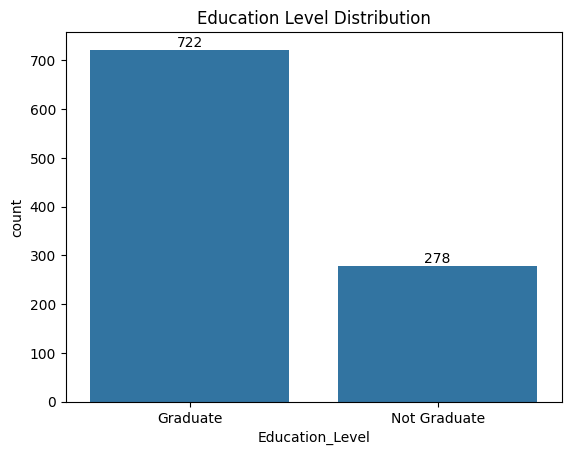

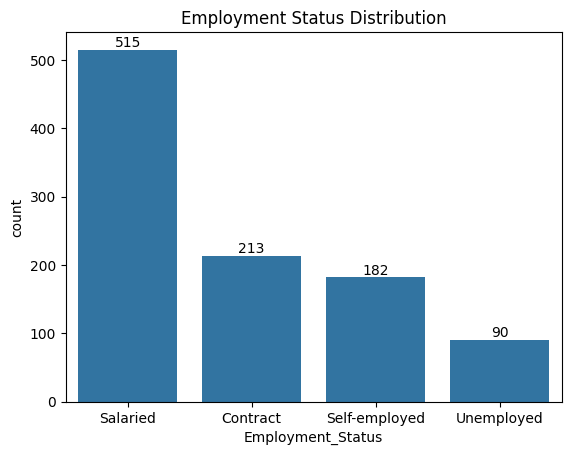

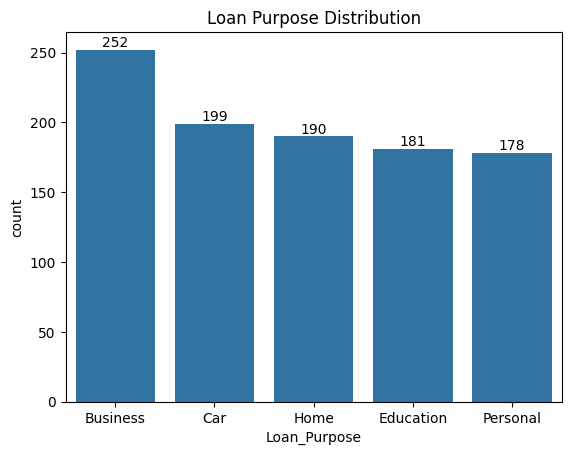

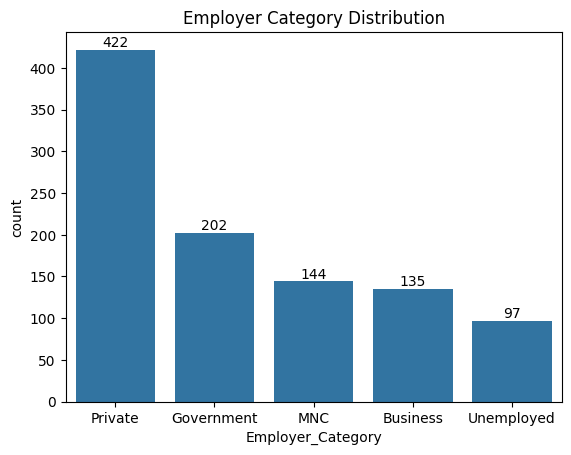

In [ ]:
# Analyze Categorical Values

Gen = df['Gender'].value_counts()
sns.barplot(x=Gen.index, y=Gen.values)
plt.bar_label(plt.gca().containers[0])
plt.title('Gender Distribution')
plt.show()

edu_cnt = df['Education_Level'].value_counts()
ax = sns.barplot(edu_cnt)
ax.bar_label(ax.containers[0])
plt.title('Education Level Distribution')
plt.show()

Emp_st = df['Employment_Status'].value_counts()
ax = sns.barplot(Emp_st)
ax.bar_label(ax.containers[0])
plt.title('Employment Status Distribution')
plt.show()

Loan_purpose = df['Loan_Purpose'].value_counts()
ax = sns.barplot(Loan_purpose)
ax.bar_label(ax.containers[0])
plt.title('Loan Purpose Distribution')
plt.show()

Emp_Cat = df['Employer_Category'].value_counts()
ax = sns.barplot(Emp_Cat)
ax.bar_label(ax.containers[0])
plt.title('Employer Category Distribution')
plt.show()

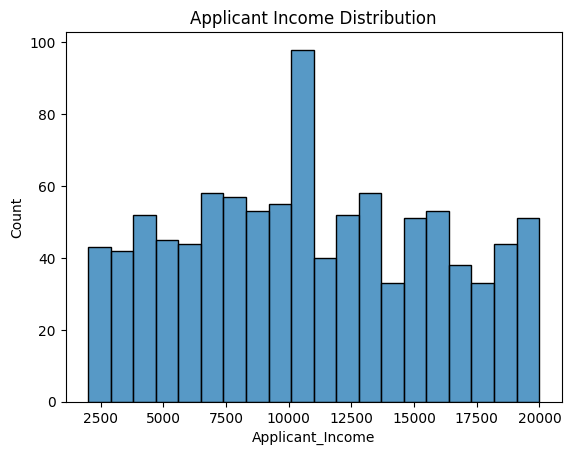

In [ ]:
# Plotting Applicant_Income to Check Income Distribution for Loan Approval

sns.histplot(df['Applicant_Income'], bins = 20)
plt.title('Applicant Income Distribution')
plt.show()

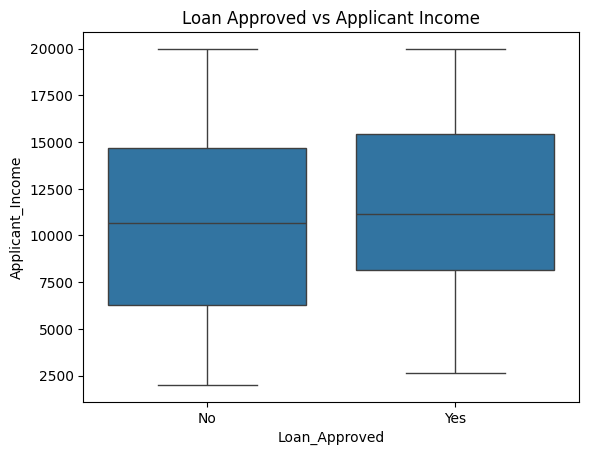

In [ ]:
# Plotting Box Plot to Check Loan Approved against Applicant Income
# Is there any outlier

sns.boxplot(x='Loan_Approved', y='Applicant_Income', data=df)
plt.title('Loan Approved vs Applicant Income')
plt.show()

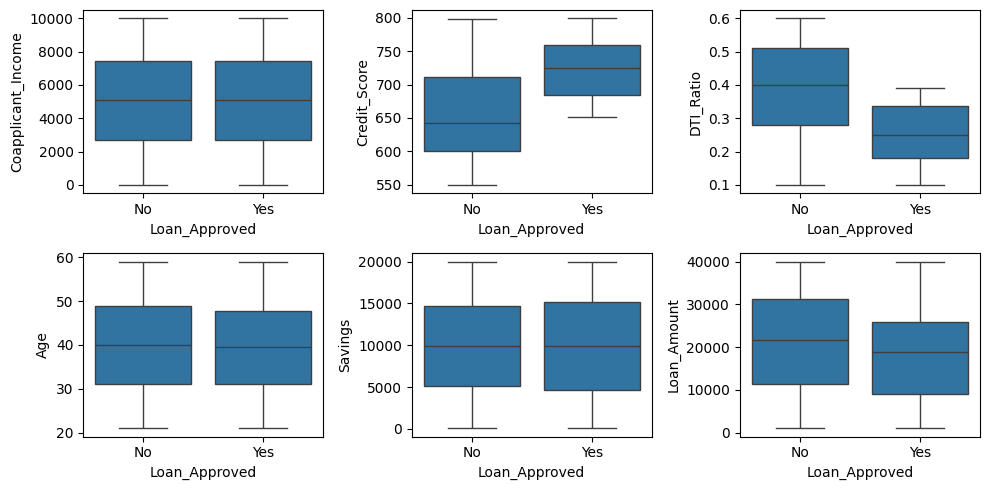

In [ ]:
# Plotting Box Plot for other cols

fig, axes = plt.subplots(2,3, figsize=(10, 5))

sns.boxplot(ax=axes[0,0], x='Loan_Approved', y='Coapplicant_Income', data=df)
sns.boxplot(ax=axes[0,1], x='Loan_Approved', y='Credit_Score', data=df)
sns.boxplot(ax=axes[0,2], x='Loan_Approved', y='DTI_Ratio', data=df)
sns.boxplot(ax=axes[1,0], x='Loan_Approved', y='Age', data=df)
sns.boxplot(ax=axes[1,1], x='Loan_Approved', y='Savings', data=df)
sns.boxplot(ax=axes[1,2], x='Loan_Approved', y='Loan_Amount', data=df)

plt.tight_layout()
plt.show()

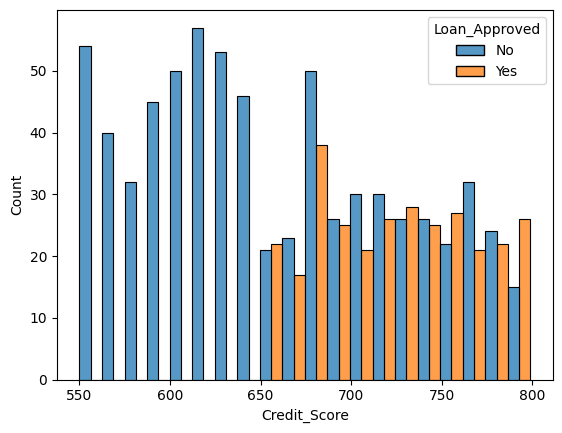

In [ ]:
# Check after what credit score Loan is Approving

sns.histplot(x='Credit_Score', data=df, hue = 'Loan_Approved', multiple = 'dodge', bins = 20)
plt.show()

In [ ]:
# Encoding Categorical Values to Convert String Values to Numerical for Training the Module
# Label Encoder = Assigns an Integer to Each Category (0,1,2)
# One Hot Encoder = Creates New Columns for Each Category (x,y,z)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df['Loan_Approved'] = le.fit_transform(df['Loan_Approved'])

In [ ]:
cols = ['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Employer_Category', 'Gender', 'Property_Area']
ohe = OneHotEncoder(drop = 'first', sparse_output= False, handle_unknown = 'ignore')
encoded = ohe.fit_transform(df[cols])
encoded_df = pd.DataFrame(encoded, columns = ohe.get_feature_names_out(cols), index = df.index)
df = pd.concat([df.drop(columns = cols), encoded_df], axis = 1)

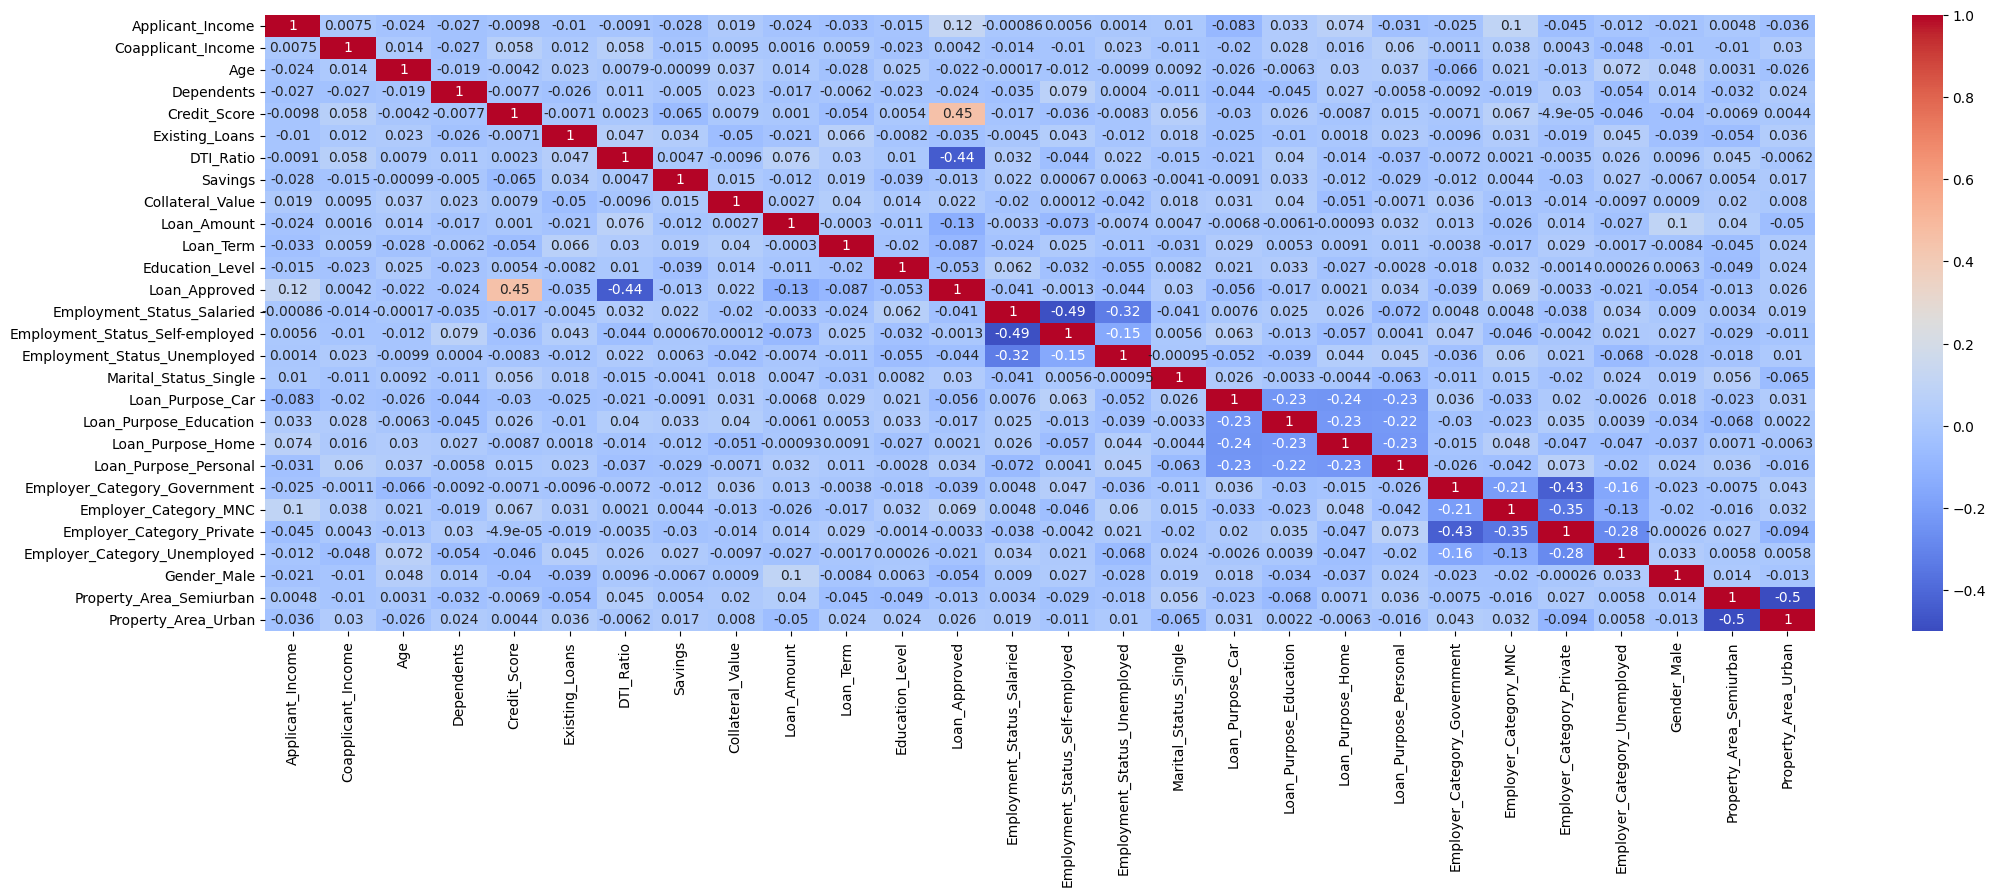

In [ ]:
# Correlation Heatmap is representation of the relationships btw numerical variables in dataset
# It shows Correlation coefficient between two numeric variables
# It range from -1 to 1

num_cols = df.select_dtypes(include='number')
corr_matrix = num_cols.corr()
corr_matrix

plt.figure(figsize=(25, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
# Relation between all the cols with Loan Approved Column
num_cols.corr()['Loan_Approved'].sort_values(ascending = False)

,Loan_Approved
Loan_Approved,1.000000
Credit_Score,0.451175
Applicant_Income,0.119796
Employer_Category_MNC,0.069049
Loan_Purpose_Personal,0.034043
Marital_Status_Single,0.030182
Property_Area_Urban,0.025963
Collateral_Value,0.021868
Coapplicant_Income,0.004230
Loan_Purpose_Home,0.002118


In [ ]:
# Train Test Split
x = df.drop(columns = ['Loan_Approved'])
y = df['Loan_Approved']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Train and Evaluate Models
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.865
0.7704918032786885
0.7833333333333333
0.7768595041322314
[[126  13]
 [ 14  47]]


In [ ]:
# KNearestNeighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.76
0.5245901639344263
0.6274509803921569
0.5714285714285714
[[120  19]
 [ 29  32]]


In [ ]:
# NaiveBayes

from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(x_train, y_train)
y_pred = NB.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.865
0.7377049180327869
0.8035714285714286
0.7692307692307693
[[128  11]
 [ 16  45]]


In [ ]:
import joblib

# Save the Logistic Regression model
joblib.dump(lr, 'logistic_regression_model.pkl')

# Save the StandardScaler
joblib.dump(sc, 'standard_scaler.pkl')

# Save the OneHotEncoder
joblib.dump(ohe, 'one_hot_encoder.pkl')

print("Model, scaler, and encoder saved successfully!")

Model, scaler, and encoder saved successfully!
